# 실습하기
> 유클리디안 유사도는 빈도수로 유사성을 판단하는 알고리즘이다.

## 1. 데이터 설정

In [3]:
docs = [
    '여름엔 과일이 맛있다',
    '여름엔 수박이 맛있다',
    '여름엔 바다지',
    '여름엔 과일이 맛없다'
]

> 위의 데이터로 유사도를 구할 경우 같은 단어들의 빈도수가 많이 나타나면 유사하다고 판단한다. 따라서 문서1과 문서2의 '여름엔', '맛있다' 라는 두 단어가 같음으로 가장 유사도가 높다고 판단할 수 있다.

## 2. 데이터 변환

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [5]:
vect_data = vect.fit_transform(docs)
vect_data

<4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [6]:
vect_data.toarray()

array([[1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1]], dtype=int64)

> 같은 단어의 갯수를 이용하여 유사도를 판단할 것이므로 CountVectorizer를 사용할 것이다.

In [8]:
vect.vocabulary_

{'여름엔': 5, '과일이': 0, '맛있다': 2, '수박이': 4, '바다지': 3, '맛없다': 1}

> fit_transform은 fit과 transform을 함께 처리하는 함수로 각 문서에 나타난모든 단어를 행렬로 만든 후 단어가 존재하는 곳에 갯수를 출력하는 기능을 한다. 이렇게 만들어진 것을 희소행렬(sparse matrix)라고 한다.

>toarray 함수를 이용하여 희소행렬의 내부 데이터를 확인할 수 있다. 현재 모든 단어들이 한번씩만 나타남으로 1로 표현되었다.

>vocabulary_를 통해 희소행렬의 feature 정보를 확인할 수 있다.

In [9]:
import pandas as pd

df = pd.DataFrame(vect_data.toarray(), columns=vect.vocabulary_)
df

,여름엔,과일이,맛있다,수박이,바다지,맛없다
0,1,0,1,0,0,1
1,0,0,1,0,1,1
2,0,0,0,1,0,1
3,1,1,0,0,0,1


> dataframe으로 변환하여 결과를 확인해 보면 feature 정보가 잘못된 것을 볼 수 있다.

In [10]:
import pandas as pd

df = pd.DataFrame(vect_data.toarray(), columns=sorted(vect.vocabulary_))
df

,과일이,맛없다,맛있다,바다지,수박이,여름엔
0,1,0,1,0,0,1
1,0,0,1,0,1,1
2,0,0,0,1,0,1
3,1,1,0,0,0,1


> dataframe 변환 시 vocabulary_ 정보가 바뀌어 들어가서 sorted함수를 이용하여 정렬을 진행하였다. 또한 index 정보를 추가하였다.

## 3. 데이터 분석

In [13]:
import numpy as np

# df.loc[0] - df.loc[1]
# np.square : 제곱계산
val_square = np.square(df.loc[0] - df.loc[1])
val_square

과일이    1
맛없다    0
맛있다    0
바다지    0
수박이    1
여름엔    0
dtype: int64

> 각 문서의 빈도수에 대한 제곱을 위와 같이 구할 수 있다.

In [15]:
val_square_sum = sum(val_square)
val_square_sum

2

> 이렇게 구한 제곱의 합을 sum함수를 이용하여 구할 수 있다.

In [16]:
n1 = np.sqrt(val_square_sum)
n1

1.4142135623730951

> 유사도는 합에 대한 루트값이므로 sqrt를 이용하여 구할 수 있다.

In [17]:
for idx in range(df.shape[0]):
    val_square = np.square(df.loc[0]-df.loc[idx])
    val_square_sum = sum(val_square)
    result = np.sqrt(val_square_sum)
    print(result)

0.0
1.4142135623730951
1.7320508075688772
1.4142135623730951


> 결국 반복문을 이용하여 문서 1에 대한 유사도를 구할 수 있다.

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(df, df)

array([[0.        , 1.41421356, 1.73205081, 1.41421356],
       [1.41421356, 0.        , 1.73205081, 2.        ],
       [1.73205081, 1.73205081, 0.        , 1.73205081],
       [1.41421356, 2.        , 1.73205081, 0.        ]])

> 간단하게 euclidean_distances를 이용하여 유사도를 판단할 수 있다. 유사도는 가까울 수록(수치가 작을 수록) 유사도가 높다고 판단할 수 있다. 

> 위의 결과로 다음과 같은 정보를 얻을 수 있다.
* 문서1과 유사도가 높은 것은 문서2와 문서4이다.
* 문서2와 문서4는 유사도가 가장 약하다
* 문서내의 긍정과 부정적 단어는 유사도에 영향을 미치지 못하며 오직 빈도수로만 유사도를 구하게 된다.
* 빈도수가 올라가면 유사도는 점점 약해진다.

## 4. Quiz

In [19]:
docs = [
        '여름엔 과일이 맛있다 여름엔 과일이 맛있다', 
        '여름엔 수박이 맛있다',
        '여름엔 바다지',
        '여름엔 과일이 맛없다']

In [21]:
vect = CountVectorizer()
vect_data = vect.fit_transform(docs)
vect_data.toarray()

array([[2, 0, 2, 0, 0, 2],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1]], dtype=int64)

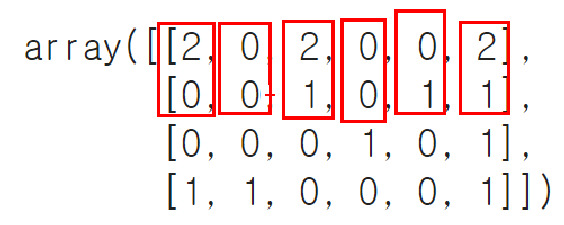

> 문서 1과 문서2 유사도는 다음과 같이 구할 수 있다.
* 2-0의 제곱 = 4
* 0-0의 제곱 = 0
* 2-1의 제곱 = 1
* 0-0의 제곱 = 0
* 0-1의 제곱 = 1
* 2-1의 제곱 = 1
* 위 내용의 전체 합은 7
* 7에 대한 루트 = 대략 2.xxx

In [23]:
df = pd.DataFrame(vect_data.toarray(), columns=vect.vocabulary_)
df

,여름엔,과일이,맛있다,수박이,바다지,맛없다
0,2,0,2,0,0,2
1,0,0,1,0,1,1
2,0,0,0,1,0,1
3,1,1,0,0,0,1


In [24]:
val_square = np.square(df.loc[0] - df.loc[1])
val_square

여름엔    4
과일이    0
맛있다    1
수박이    0
바다지    1
맛없다    1
dtype: int64

In [26]:
val_square_sum = sum(val_square)
val_square_sum

7

In [27]:
np.sqrt(val_square_sum)

2.6457513110645907

> 중복된 데이터가 나타나면서 유사도는 약해지게 된다. 결국 유클리디안 유사도의 문제점은 중복된 데이터가 나타나면 이를 다른 문서로 판단하게 된다는 것이다.

In [28]:
euclidean_distances(df, df)

array([[0.        , 2.64575131, 3.16227766, 2.64575131],
       [2.64575131, 0.        , 1.73205081, 2.        ],
       [3.16227766, 1.73205081, 0.        , 1.73205081],
       [2.64575131, 2.        , 1.73205081, 0.        ]])

> 위와 같이 한번에 처리도 가능하다

In [30]:
import pandas as pd

df_movies = pd.read_csv('data/tmdb_5000_movies.csv')
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [31]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

```
id : 아이디
title : 영화 제목
genres : 장르
vote_average : 평점
vote_count : 투표수
popularity : 인기도
keywords : 주요 키워드
overview : 영화 개요
tmdb_5000_movies.csv 열어 위의 내용만 가지고 있는 DataFrame을 생성하시오
```

In [40]:
movie_features = ['id', 'title', 'genres','vote_average', 'vote_count', 'popularity', 
                    'keywords', 'overview']
df_movies_back = df_movies[movie_features]
df_movies_back.head(2)

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."


In [41]:
df_movies_back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [42]:
df_movies_back = df_movies_back.dropna()
df_movies_back.isnull().sum()

id              0
title           0
genres          0
vote_average    0
vote_count      0
popularity      0
keywords        0
overview        0
dtype: int64

In [44]:
df_movies_back[['genres', 'keywords']][:3]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."


In [45]:
pd.set_option('max_colwidth', 100)
df_movies_back[['genres', 'keywords']][:3]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret..."


In [47]:
dict = {'id':28, 'name':'Action'}

In [49]:
dict['id']

28

In [50]:
str_dict = "{'id':28, 'name':'Action'}"
str_dict

"{'id':28, 'name':'Action'}"

In [51]:
df_movies_back['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [52]:
type(df_movies_back['genres'][0])

str

In [64]:
str_dict = '[{"id":28, "name":"Action"}]'
type(str_dict)

str

In [65]:
from ast import literal_eval
str_dict = literal_eval(str_dict)
str_dict

[{'id': 28, 'name': 'Action'}]

In [68]:
str_dict[0]['id']

28

In [69]:
tmp = literal_eval(df_movies_back['genres'][0])

In [70]:
type(tmp)

list

In [71]:
tmp[0]

{'id': 28, 'name': 'Action'}

In [72]:
tmp[0]['id']

28

In [73]:
tmp[0]['name']

'Action'

In [74]:
len(tmp)

4

In [75]:
for i in range(len(tmp)):
    print(tmp[i]['name'])

Action
Adventure
Fantasy
Science Fiction


In [76]:
df_movies_back['genres'] = df_movies_back['genres'].apply(literal_eval)
df_movies_back['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [77]:
for genre in df_movies_back['genres'][0]:
    print(genre['name'])

Action
Adventure
Fantasy
Science Fiction


In [78]:
df_movies_back['genres'] = df_movies_back['genres'].apply(lambda x: [genre['name'] for genre in x])
df_movies_back['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [79]:
' '.join(df_movies_back['genres'][0])

'Action Adventure Fantasy Science Fiction'

In [141]:
df_movies_back['genres_split'] = df_movies_back['genres'].apply(lambda x: (' ').join(x))
df_movies_back['genres_split'][0]

'Action Adventure Fantasy Science Fiction'

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2))
vect.fit(df_movies_back['genres_split'])
vect.vocabulary_

{'action': 0,
 'adventure': 16,
 'fantasy': 124,
 'science': 232,
 'fiction': 138,
 'action adventure': 1,
 'adventure fantasy': 24,
 'fantasy science': 135,
 'science fiction': 233,
 'fantasy action': 125,
 'crime': 64,
 'adventure crime': 20,
 'drama': 90,
 'thriller': 234,
 'action crime': 4,
 'crime drama': 68,
 'drama thriller': 106,
 'adventure science': 29,
 'animation': 33,
 'family': 109,
 'animation family': 38,
 'fantasy family': 130,
 'action science': 12,
 'adventure action': 17,
 'action thriller': 13,
 'thriller crime': 238,
 'western': 265,
 'adventure western': 32,
 'adventure family': 23,
 'family fantasy': 115,
 'fiction action': 139,
 'action fantasy': 7,
 'comedy': 44,
 'action comedy': 3,
 'comedy science': 59,
 'adventure drama': 22,
 'drama action': 91,
 'romance': 214,
 'drama romance': 104,
 'romance thriller': 228,
 'thriller action': 235,
 'fiction thriller': 150,
 'adventure thriller': 30,
 'fantasy adventure': 126,
 'family adventure': 111,
 'adventure com

In [143]:
vect_data = vect.transform(df_movies_back['genres_split'])
vect_data.shape

(4800, 276)

In [144]:
sim = euclidean_distances(vect_data, vect_data)

In [145]:
sim[:3]

array([[0.        , 2.44948974, 2.82842712, ..., 4.24264069, 3.        ,
        3.16227766],
       [2.44948974, 0.        , 2.44948974, ..., 3.74165739, 2.23606798,
        2.44948974],
       [2.82842712, 2.44948974, 0.        , ..., 3.74165739, 2.23606798,
        2.44948974]])

In [146]:
sim.argsort()[:3]

array([[   0, 3493,  813, ..., 2048, 3730, 1523],
       [ 379, 2390,   12, ..., 2264, 3730, 1523],
       [1740,    2, 1542, ..., 3730,  575, 1277]], dtype=int64)

In [148]:
sim_sorted = sim.argsort()
sim_sorted[:40]

array([[   0, 3493,  813, ..., 2048, 3730, 1523],
       [ 379, 2390,   12, ..., 2264, 3730, 1523],
       [1740,    2, 1542, ..., 3730,  575, 1277],
       ...,
       [1999,   37, 1074, ...,  542, 1271, 2264],
       [ 126,  786,   30, ..., 1523, 2264,  575],
       [1490, 1990,  508, ..., 3730, 1449, 1523]], dtype=int64)

In [149]:
df_movies_back.shape

(4800, 9)

In [150]:
sim_sorted.shape

(4800, 4800)

In [154]:
df_movies_back = df_movies_back.reset_index(drop=True)

In [153]:
df_movies_back.iloc[-1]

index                                                                                                          4802
id                                                                                                            25975
title                                                                                             My Date with Drew
genres                                                                                                [Documentary]
vote_average                                                                                                    6.3
vote_count                                                                                                       16
popularity                                                                                                 1.929883
keywords        [{"id": 1523, "name": "obsession"}, {"id": 2249, "name": "camcorder"}, {"id": 9986, "name": "cru...
overview        Ever since the second grade when he first saw her in E.T

In [156]:
df_movies_back.iloc[4799][['title', 'genres']]

title     My Date with Drew
genres        [Documentary]
Name: 4799, dtype: object

In [157]:
df_movies_back.iloc[4682][['title', 'genres']]

title     The Case of the Grinning Cat
genres                   [Documentary]
Name: 4682, dtype: object

In [158]:
df_movies_back.iloc[3502][['title', 'genres']]

title      Lake of Fire
genres    [Documentary]
Name: 3502, dtype: object

In [162]:
title = 'My Date with Drew'
find_movie = df_movies_back[df_movies_back['title'].str.lower()==title.lower()]
find_movie.index.values

array([4799], dtype=int64)

In [163]:
idx = find_movie.index.values[0]
sim_sorted[idx, :10]

array([4799, 4682, 3502, 4686, 4381, 4380, 4379, 4695, 4703, 4707],
      dtype=int64)

In [164]:
for i in sim_sorted[idx, :10]:
    print(df_movies_back.iloc[i]['title'])

My Date with Drew
The Case of the Grinning Cat
Lake of Fire
The Trials Of Darryl Hunt
Once in a Lifetime: The Extraordinary Story of the New York Cosmos
Taxi to the Dark Side
The Act of Killing
Butterfly Girl
The Horse Boy
Antarctic Edge: 70° South


In [165]:
title = 'Avatar'
find_movie = df_movies_back[df_movies_back['title'].str.lower()==title.lower()]
find_movie.index.values

array([0], dtype=int64)

In [166]:
idx = find_movie.index.values[0]
sim_sorted[idx, :10]

array([   0, 3493,  813,  870,   14,   46,  419, 1652,  420, 1296],
      dtype=int64)

In [167]:
for i in sim_sorted[idx, :10]:
    print(df_movies_back.iloc[i]['title'])

Avatar
Beastmaster 2: Through the Portal of Time
Superman
Superman II
Man of Steel
X-Men: Days of Future Past
Jumper
Dragonball Evolution
Hellboy II: The Golden Army
Superman III
